# The Brain Tumor Detection



In [1]:
!nvidia-smi

Tue Aug 29 12:30:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [4]:
# Git clone method (for development)

%cd {HOME}
!git clone github.com/ultralytics/ultralytics
%cd {HOME}/ultralytics
!pip install -e .

# from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/01_DATASET/yolo_v7/brain.yaml epochs=50 imgsz=640 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/01_DATASET/yolo_v7/brain.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript,

/content


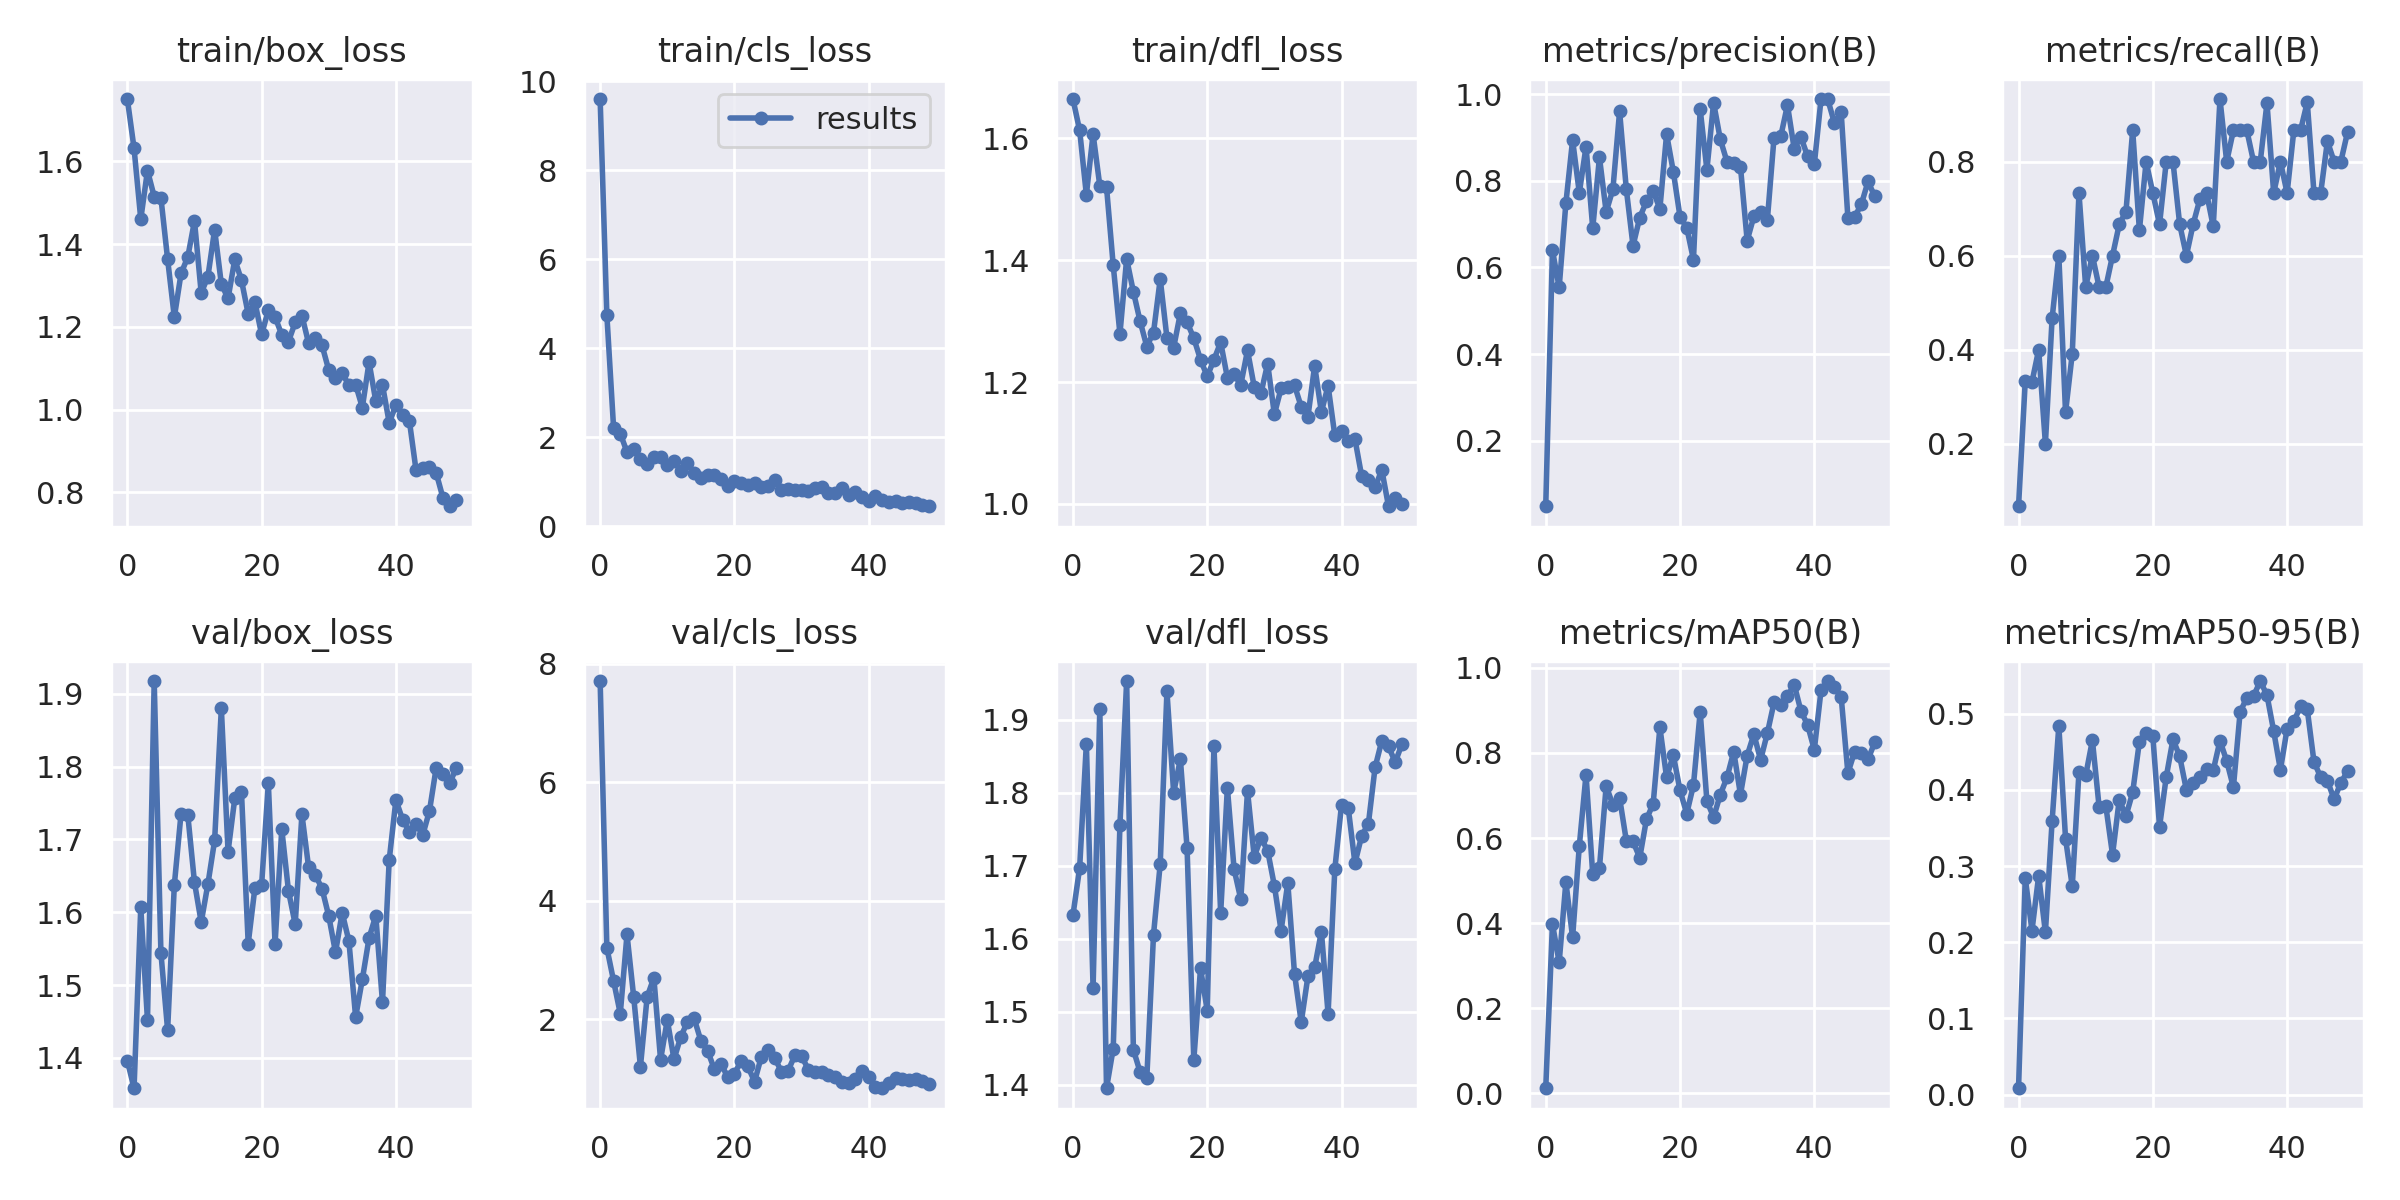

In [10]:
%cd {HOME}
Image(filename='/content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/02_RESULTS_YOLO/YOLOv8/train/results.png', width=600)

/content


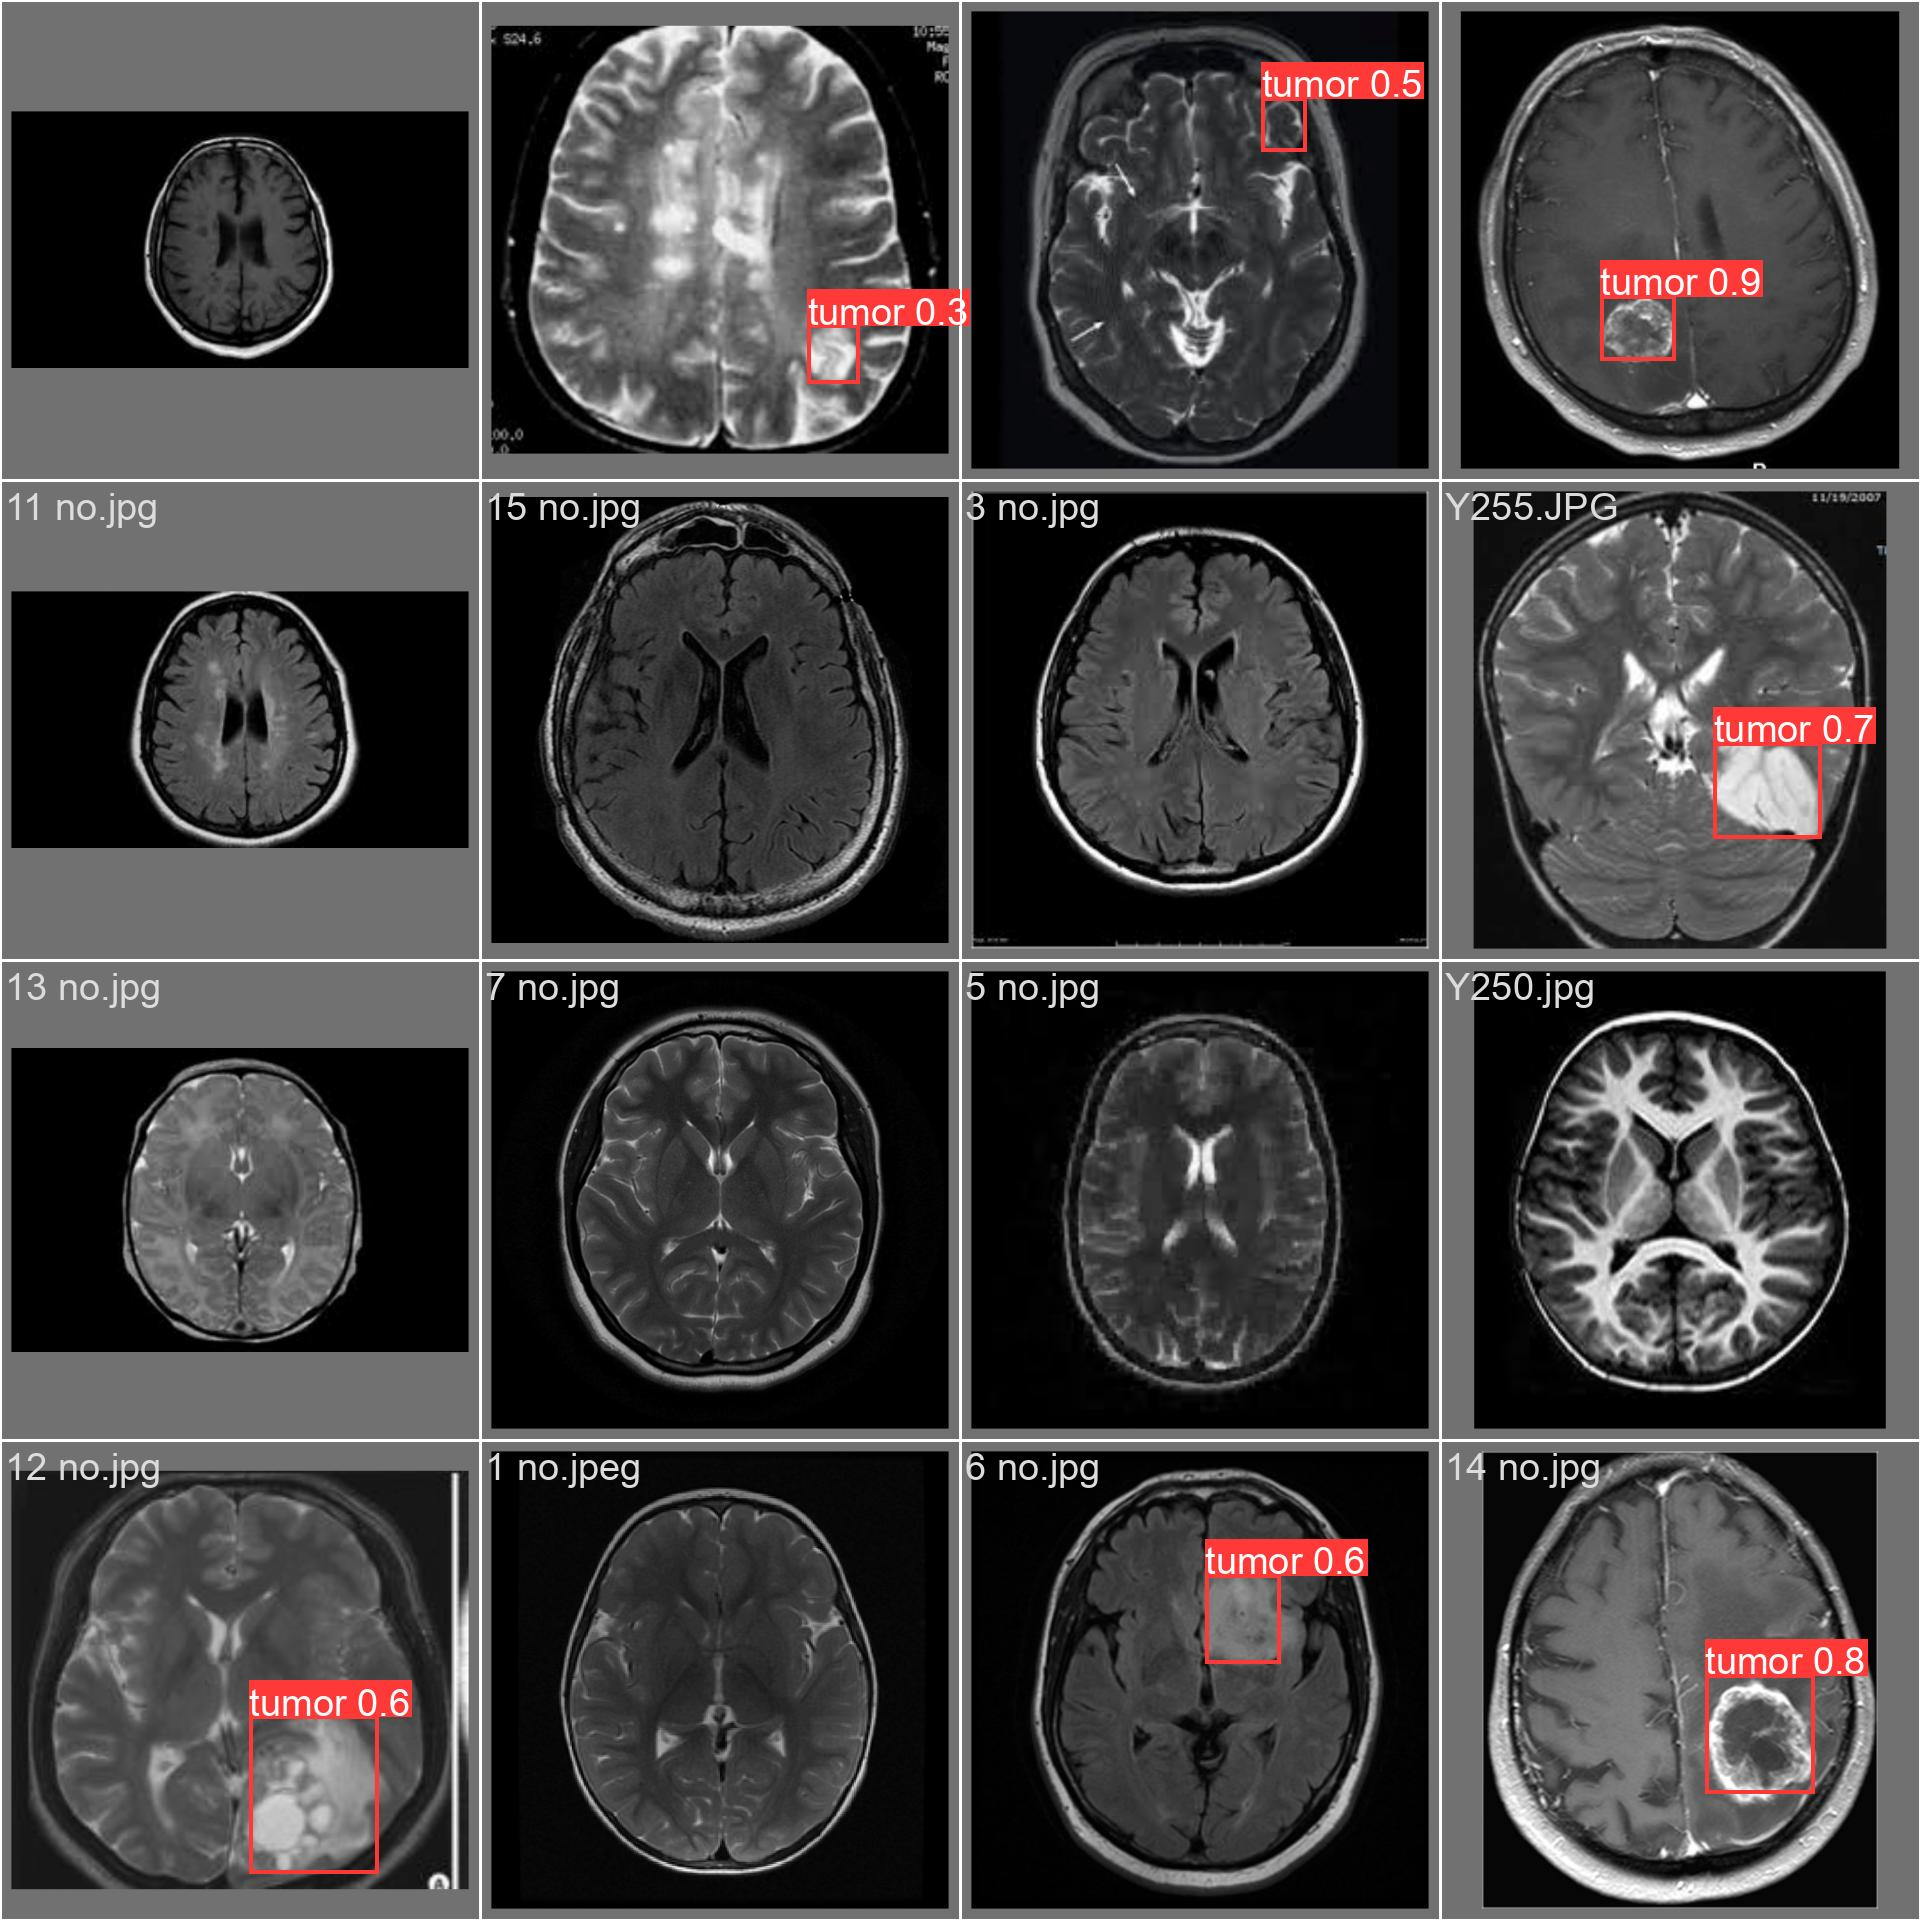

In [11]:
%cd {HOME}
Image(filename='/content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/02_RESULTS_YOLO/YOLOv8/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [12]:
%cd {HOME}

!yolo task=detect mode=val model=/content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/02_RESULTS_YOLO/YOLOv8/train/weights/best.pt data=/content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/01_DATASET/yolo_v7/brain.yaml

/content
2023-08-29 12:56:43.134567: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-29 12:56:44.147904: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/01_DATASET/yolo_v7/valid/labels.cache... 30 images, 15 backgrounds, 0 corrupt: 100% 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.42it/s]
                   all         30         15      0.919      0.756     

## Inference with Custom Model

In [14]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/02_RESULTS_YOLO/YOLOv8/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/01_DATASET/yolo_v7/valid/images save=True

/content
2023-08-29 12:58:50.912327: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-29 12:58:52.126788: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/30 /content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/01_DATASET/yolo_v7/valid/images/1 no.jpeg: 640x640 16.3ms
image 2/30 /content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/01_DATASET/yolo_v7/valid/images/10 no.jpg: 640x576 73.5ms
image 3/30 /content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/01_DATASET/yolo_v7/valid/images/11 no.jpg

**NOTE:** Let's take a look at few results.

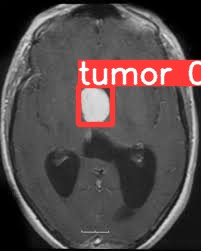

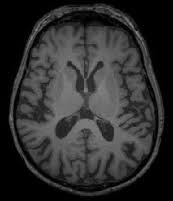

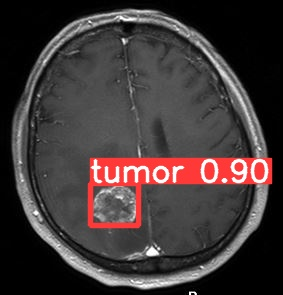

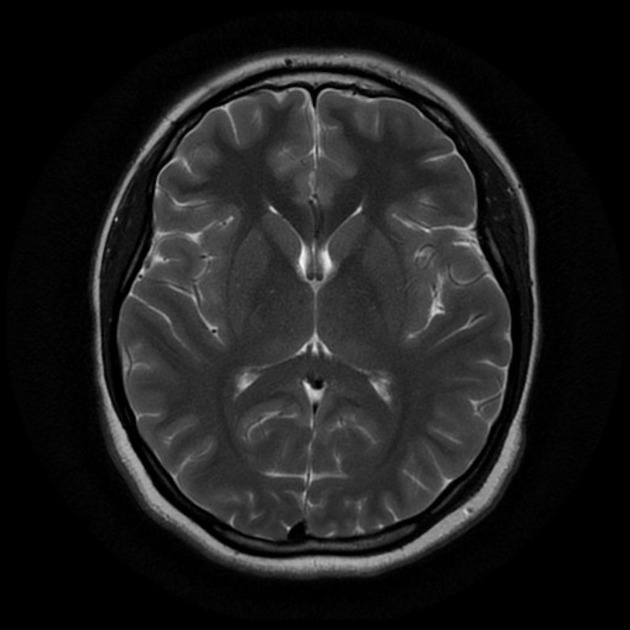

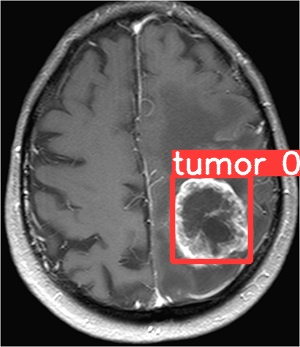

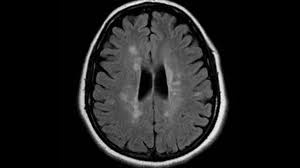

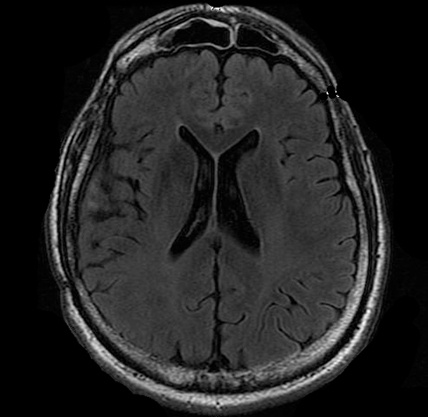

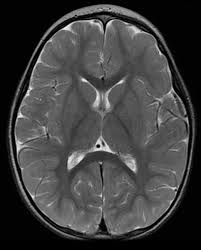

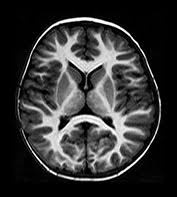

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/drive/MyDrive/01_DataScience/09_BRAIN_TUMOR_DETECTION/02_RESULTS_YOLO/YOLOv8/predict/*')[:9]:
      display(Image(filename=image_path, width=600))
      print("\n")